# Benchmarking Bilby on NERSC using `bilby_pipe`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
algorithms = ["act-walk","unif","acceptance-walk","rwalk","slice","rslice","hslice","rwalk_dynesty"] # Algorithm name
cpu = [18.96,0,44.61,0,0,0,0,0] # CPU efficiency [%]
memory = [99.72,0,55.33,0,0,0,0,0] # Memory efficiency [%]
jobIDs = [37802468,0,37870741,0,0,0,0,0] # The jobIDs here

## Here, we have the results for the same sampler settings, and different algorithms.

From private communication with Nikhil Sarin, developer of bilby

```
No, I think that it's not even sampler settings really. Like this probably depends very strongly on the algorithm e.g., rejection sampling vs rwalk and stuff like that.
```

Below we show the results of a debug job that ran for 30 minutes. `bilby_pipe` jobs are split into four steps, with the second step being the most computationally intensive (running the MCMC chains). All of the 30 minute debug jobs were unable to complete the second step and ran until timeout.

The jobs were ran with all other parameters identical, using the same gravitational wave event. This event has a network SNR of 9, which is the minimum for usage in our studies. Higher SNR will converge faster, and therefore be computationally less expensive. Therefore, this represents a worst-case event for our studies.

Below we present the `seff` results for step 2 of the full job submission, since step 2 is the most computationally expensive. In all cases, we used one node, with 256 CPUs and GB of memory.

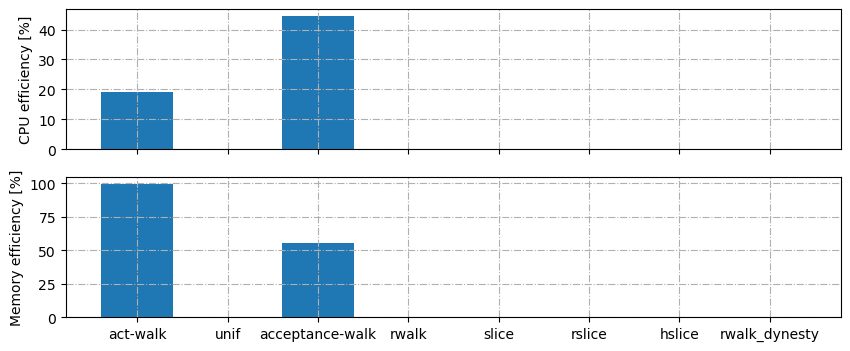

In [21]:
fig,axs = plt.subplots(2,1,figsize=[10,4],sharex=True)

axs[0].bar(algorithms,cpu)
axs[0].set_ylabel("CPU efficiency [%]")


axs[1].bar(algorithms,memory)
axs[1].set_ylabel("Memory efficiency [%]")

for ax in axs:
    ax.grid(ls="-.")

## Based on the above, we find the `` sampler algorithm to be the most efficient.

## Here, we provide the results from a production level job that ran to completion using the `` sampler algorithm. 

## Based on the above result, and the need for 2,000 GW events in our analysis, we request `` CPU node-hours and 0 GPU node-hours for this work